In [1]:
import pymaid
import navis as nv
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.axes as axx
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=18)
import time
from navis.interfaces import neuprint as nvneu
from neuroboom import dendrogram as nbd
import neuroboom as nb
import seaborn as sns

In [2]:
#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"<token>")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [3]:
#get PNs
md1upn = pymaid.get_neuron(295)
MD1uPN = md1upn.id
MD2uPN = pymaid.get_neuron(690)
MD3uPN = pymaid.get_neuron(11126)

In [4]:
#define OSNs
MD3OSNs = pymaid.get_skids_by_annotation(['innervates MD3', 'left palp nerve', 'sensory neuron'], allow_partial = False, intersect = True)
MD3osns=pymaid.get_neuron(MD3OSNs)

#get connector IDs
con_details = pymaid.get_connector_details(MD3uPN)
con_details_explode=con_details.explode("postsynaptic_to")
con_details_sub=con_details_explode[con_details_explode["postsynaptic_to"].isin(MD3OSNs)].copy()

#color dictionary
feedforward_color=sns.color_palette('Greens', 1)*46
feedforward_id_to_color= dict(zip(MD3OSNs, feedforward_color))

#map to the neuron
connector_id_to_neuron = dict(zip(con_details_sub.connector_id, con_details_sub.postsynaptic_to))
connector_id_to_color = {i : feedforward_id_to_color[connector_id_to_neuron[i]] for i in con_details_sub.connector_id}

Fetch neurons:   0%|          | 0/46 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/46 [00:00<?, ?it/s]

CN details:   0%|          | 0/6891 [00:00<?, ?it/s]

INFO  : Data for 6891 of 6891 unique connector IDs retrieved (pymaid)


Downsampling neuron, factor = 2
Calculating cable length...


/home/jb534/miniconda3/envs/wuzzy/lib/python3.9/site-packages/pygraphviz/agraph.py:1405: RuntimeWarning:

Error: node 951136, position [336991.56 234787.53 148920.  ], expected two doubles
Error: node 460733, position [337268.1  235196.94 149120.  ], expected two doubles
Error: node 951139, position [336435.56 234611.53 148560.  ], expected two doubles
Error: node 1159426, position [336040.25 229781.6  149080.  ], expected two doubles
Error: node 1054299, position [336525.72 229615.73 149320.  ], expected two doubles
Error: node 951144, position [336011.56 233947.53 148000.  ], expected two doubles
Error: node 446614, position [336054.06 234039.86 147920.  ], expected two doubles
Error: node 826482, position [343930.47 229411.55 146920.  ], expected two doubles
Error: node 817780, position [343856.56 229506.66 146800.  ], expected two doubles
Error: node 951147, position [339675.97 229161.81 141560.  ], expected two doubles
Error: node 447778, position [339754.03 229064.36 141680.  ], 

Plotting Tree...
Plotting connectors...
Completed in 12106s


<Figure size 640x480 with 0 Axes>

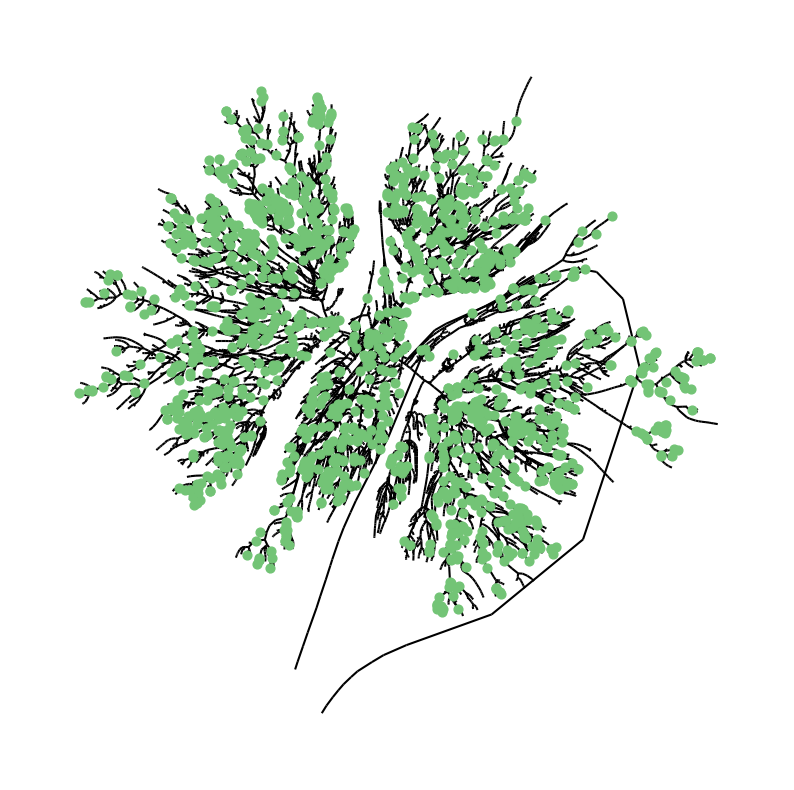

In [5]:
#plot the MD3 uPN dendrogram
plt.clf()
fig, ax= plt.subplots(figsize = (10,10))
nbd.plot_dendrogram(MD3uPN, fragment='true', prog='neato', downsample_neuron=2,linewidth=1.5, highlight_connectors = connector_id_to_color, highlight_connector_size=40)
plt.savefig('/home/jb534/pymaid_scripts/figs/axogram_md3_uPN_3.svg', format="svg")
plt.show()